<a href="https://colab.research.google.com/github/shravaniprakashchaube/case_study/blob/main/Netflixrecomndation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [4]:
path = "/content/sample_data/netflix_titles - Copy.csv"
data = pd.read_csv(path)

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
fig = ['type','show_id']
distribution = data[fig]
distribution = distribution.groupby('type').count()
distribution

,show_id
type,
Movie,6131
TV Show,2676


([<matplotlib.patches.Wedge at 0x7ce124eb8910>,
 [Text(-0.6357552620136555, 0.897672126570692, 'Movie'),
  Text(0.6357552620136554, -0.8976721265706921, 'TV Show')])

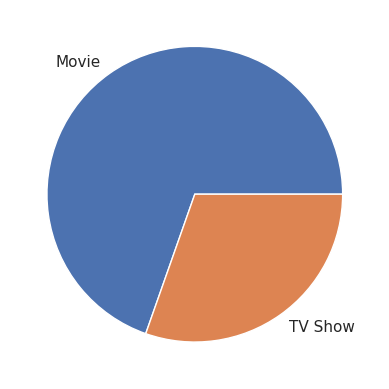

In [ ]:



import matplotlib.pyplot as plt
labels = ['Movie','TV Show']
sizes = [6131, 2676]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'])
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,7.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0


In [ ]:
fig = ['year_added','type','show_id']
time = data[fig].dropna()
time = time.groupby(['year_added','type']).count().unstack().fillna(0)

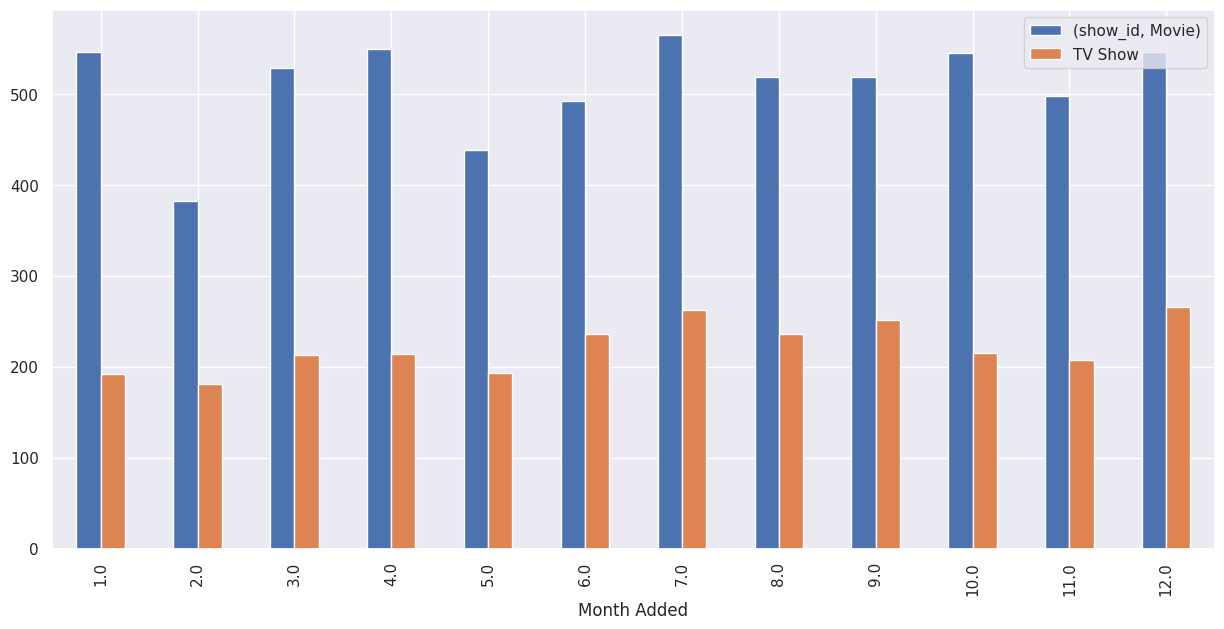

In [ ]:
month_fig = ['month_added','type','show_id']
month = data[month_fig]
month = month.groupby(['month_added','type']).count()

fig, ax_month = plt.subplots(figsize = (15, 7))
month.unstack().plot.bar(ax = ax_month)

ax_month.set_xlabel('Month Added')
plt.legend().get_texts()[0].set_text('Movie')
plt.legend().get_texts()[1].set_text('TV Show')

<Axes: xlabel='year_added'>

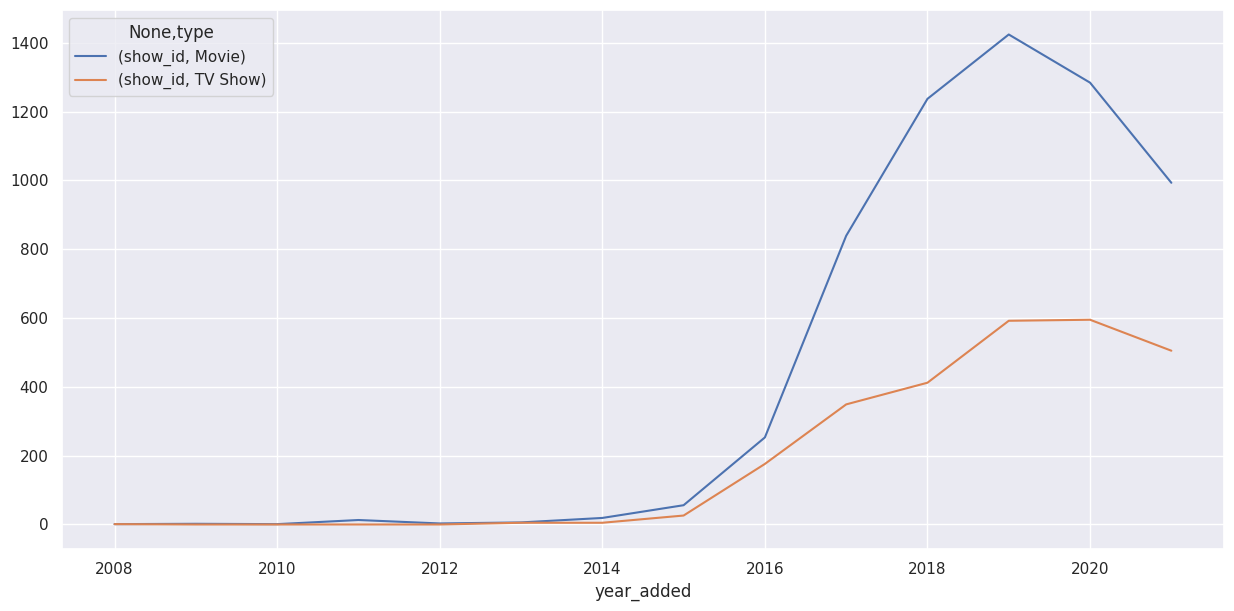

In [ ]:
fig, ax_time = plt.subplots(figsize = (15, 7))

time.plot(ax = ax_time)

In [ ]:
rating_fig = ['type','rating','show_id']
rating = data[rating_fig]
rating = rating.groupby(['rating','type']).count()
rating = rating.rename(columns = {'show_id':'number of content'})
rating

number of content
rating   type                      
66 min   Movie                    1
74 min   Movie                    1
84 min   Movie                    1
G        Movie                   41
NC-17    Movie                    3
NR       Movie                   75
         TV Show                  5
PG       Movie                  287
PG-13    Movie                  490
R        Movie                  797
         TV Show                  2
TV-14    Movie                 1427
         TV Show                733
TV-G     Movie                  126
         TV Show                 94
TV-MA    Movie                 2062
         TV Show               1145
TV-PG    Movie                  540
         TV Show                323
TV-Y     Movie                  131
         TV Show                176
TV-Y7    Movie                  139
         TV Show                195
TV-Y7-FV Movie                    5
         TV Show                  1
UR       Movie                    3

Text(0.5, 0, 'Rating')

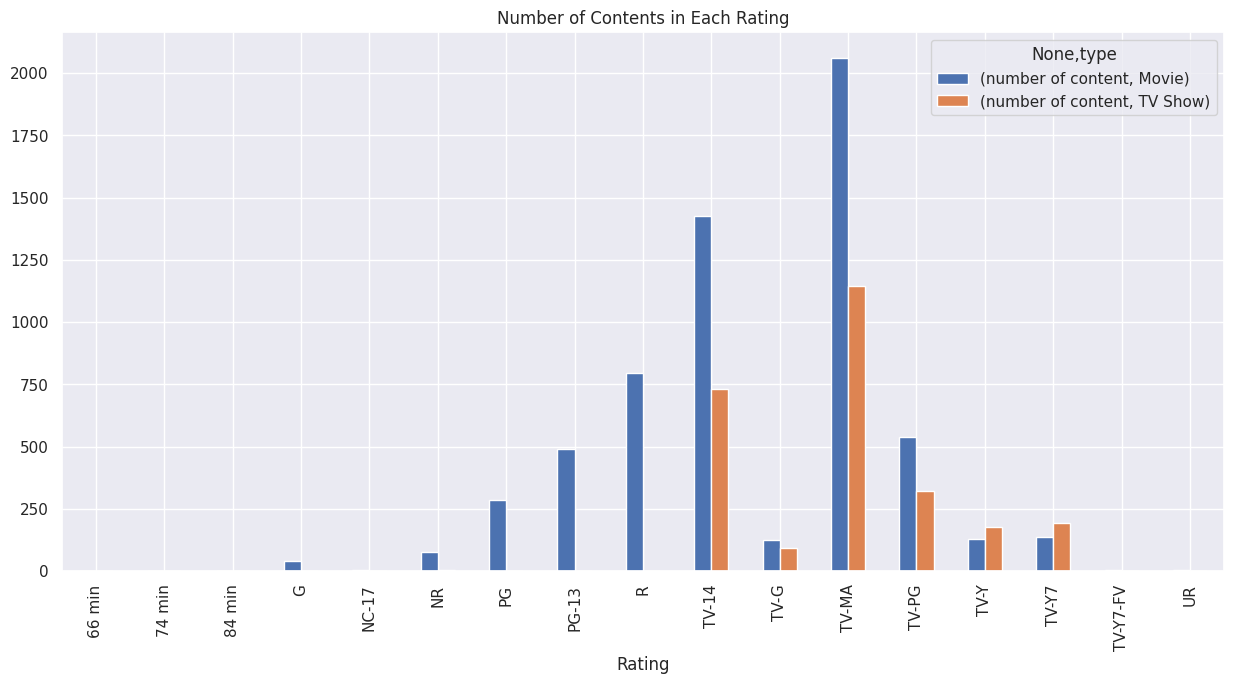

In [ ]:
fig, ax_rating = plt.subplots(figsize = (15, 7))
rating.unstack().plot.bar(ax = ax_rating)

ax_rating.set_title('Number of Contents in Each Rating')
ax_rating.set_xlabel('Rating')

In [ ]:
tv_show = data.loc[data['type'] == 'TV Show']
tv_show['series number'] = tv_show['duration'].str.extract(pat = '(\d+)')

<ipython-input-41-3510abd6f327>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show['series number'] = tv_show['duration'].str.extract(pat = '(\d+)')


In [ ]:
tv_show['series number'] = tv_show['series number'].astype(int)
tv_show.dtypes

<ipython-input-42-f968e30e30d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show['series number'] = tv_show['series number'].astype(int)


show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
rating           object
duration         object
listed_in        object
description      object
series number     int64
dtype: object

In [ ]:
series_fig = ['series number','show_id']
series = tv_show[series_fig]
series = series.rename(columns = {'show_id':'number of countents'})
series

,series number,number of countents
1,2,s2
2,1,s3
3,1,s4
4,2,s5
5,1,s6
...,...,...
8795,2,s8796
8796,2,s8797
8797,3,s8798
8800,1,s8801


Text(0.5, 0, 'Number of Series')

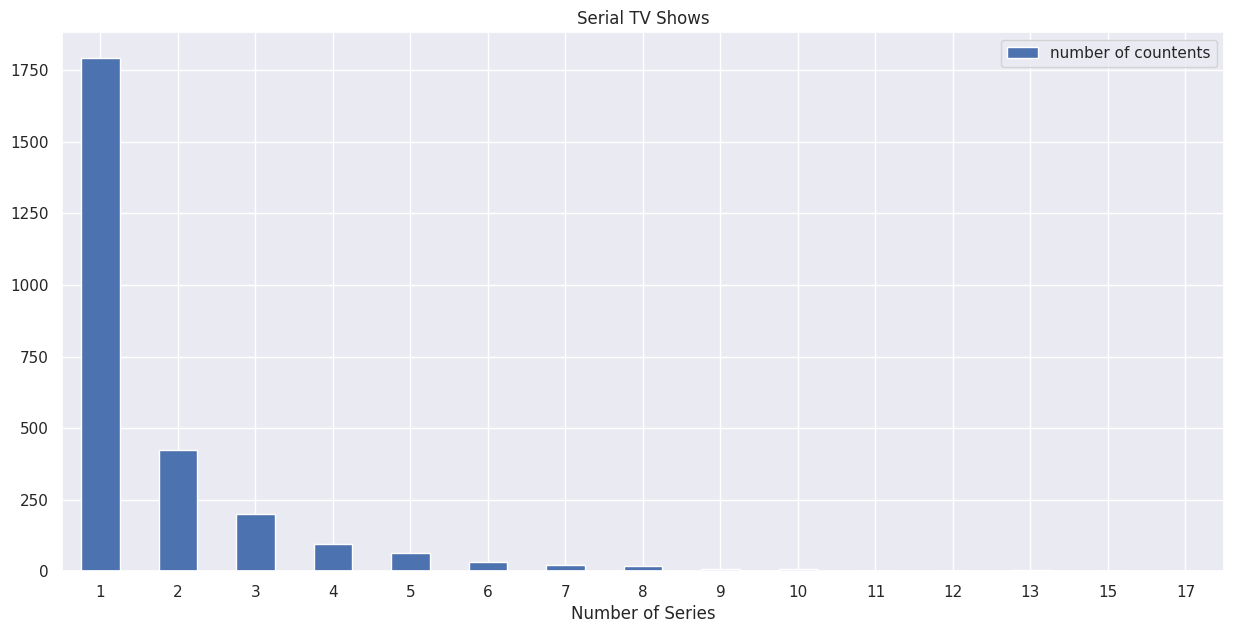

In [ ]:
fig, ax_series = plt.subplots(figsize = (15,7))

series.groupby('series number').count().plot.bar(ax = ax_series)
plt.xticks(rotation = 0)
ax_series.set_title('Serial TV Shows')
ax_series.set_xlabel('Number of Series')

In [ ]:
movie = data.loc[data['type'] == 'Movie']
movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
duration.groupby('minute').count()

,show_id,duration
minute,,
10,1,1
100,108,108
101,116,116
102,122,122
103,114,114
...,...,...
95,137,137
96,130,130
97,146,146


<ipython-input-61-81772f70c8c5>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax = ax_hist)


Text(0.5, 0, '')

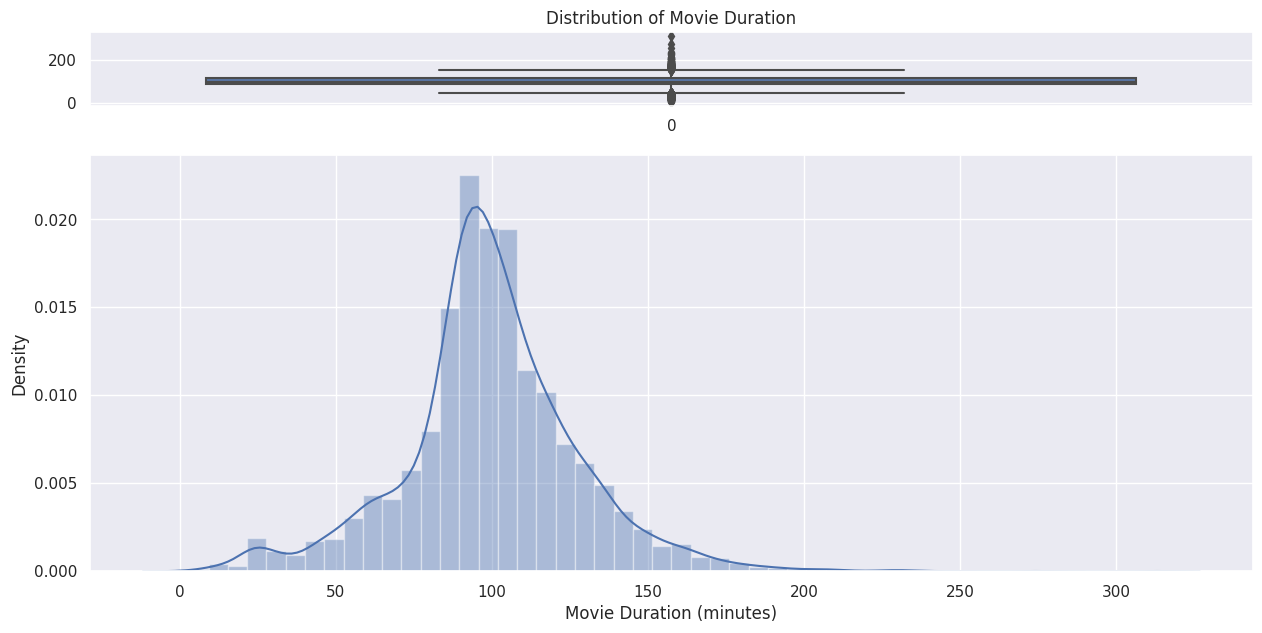

In [ ]:
import seaborn as sns
fig, (ax_box, ax_hist) = plt.subplots(2,gridspec_kw = {'height_ratios': (0.15, 0.85)},figsize = (15, 7))
x = duration['minute']
x.fillna(0)

sns.boxplot(x, ax = ax_box)
sns.distplot(x, ax = ax_hist)

ax_box.set_title('Distribution of Movie Duration')
ax_hist.set_xlabel('Movie Duration (minutes)')
ax_hist.set_ylabel('Density')
ax_box.set_xlabel('')

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

test_data = data.head()

In [11]:
count_vectorizer = CountVectorizer(stop_words = 'english')
sparse_matrix = count_vectorizer.fit_transform(test_data['description'])
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix,
                 columns = count_vectorizer.get_feature_names_out(),
                 index = ['0','1','2','3','4'])
df

,abducted,birth,campus,cape,center,centers,city,coaching,collegiate,comical,...,thief,toilet,town,train,turf,unexceptional,violent,war,ways,women
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,1,0,0,1,1,1,1,0,...,0,0,0,1,0,1,0,0,0,0


In [12]:
cosine_similarity(df, df)

array([[1.        , 0.        , 0.        , 0.        , 0.06454972],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.06454972, 0.        , 0.        , 0.        , 1.        ]])

In [15]:
rec_data = data
rec_data['description'] = rec_data['description'].fillna('')
count_vectorizer = CountVectorizer(stop_words = 'english')
sparse_matrix = count_vectorizer.fit_transform(rec_data['description'])

doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix,
                 columns = count_vectorizer.get_feature_names_out(),
                 index = rec_data['title'])
df

,000,007,009,10,100,1000,102,108,10th,11,...,zé,álex,álvaro,ángel,émile,ömer,über,łukasz,ōarai,şeref
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Blood & Water,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ganglands,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jailbirds New Orleans,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kota Factory,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zombie Dumb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zombieland,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
series = pd.Series(rec_data.index, index = rec_data['title'])

res = cosine_similarity(df, df)

In [17]:
def recommandation(title):
    index = series[title]

    score = res[index, :]

    score = list(enumerate(score))

    score = sorted(score, key = lambda x: x[1], reverse = True)
    score = score[1:11]

    movie_index = [i[0] for i in score]

    return rec_data['title'].iloc[movie_index]

In [18]:
recommandation('Peaky Blinders')

208     Once Upon a Time in Mumbaai
8293                       The Fear
2209                          Nimbe
3133                            Don
1510                  The Con Is On
2646                 My Stupid Boss
8467                     The Prison
7683                  Our Godfather
2576            All Day and a Night
6077                      Abdo Mota
Name: title, dtype: object

In [19]:
recommandation('Breaking Bad')

6616                      Dismissed
1237                       Mariposa
1920                The Book of Sun
803     Ouran High School Host Club
6996                       Hormones
2388                  Alexa & Katie
2491         The School of Mischief
2531                     Dilan 1990
1067                 The Underclass
1375                        BONDING
Name: title, dtype: object